## How to train a convolutional neurel network to classify 102 flowers species with fastai library (error rate 3.9%)

Dataset: [102 Flowers Diff Species](https://www.kaggle.com/lenine/flower-102diffspecies-dataset/kernels) from Kaggle website

In [66]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [67]:
from fastai import *
from fastai.vision import *
import matplotlib.pyplot as plt 

In [68]:
bs = 64

In [71]:
path = Path('/home/wyquek/.fastai/data/flower_data')

In [72]:
path.ls()

[PosixPath('/home/wyquek/.fastai/data/flower_data/valid'),
 PosixPath('/home/wyquek/.fastai/data/flower_data/train')]

In [74]:
data = ImageDataBunch.from_folder(path, ds_tfms = get_transforms(), size = 224)

In [75]:
data.normalize(imagenet_stats) # normalize to same mean and std dev

ImageDataBunch;
Train: LabelList
y: CategoryList (6552 items)
['99' '99' '99' '99' ... '24' '24' '24' '24']
Path: .
x: ImageItemList (6552 items)
[PosixPath('/home/wyquek/.fastai/data/flower_data/train/99/image_07867.jpg')
 PosixPath('/home/wyquek/.fastai/data/flower_data/train/99/image_07879.jpg')
 PosixPath('/home/wyquek/.fastai/data/flower_data/train/99/image_07852.jpg')
 PosixPath('/home/wyquek/.fastai/data/flower_data/train/99/image_07890.jpg') ...
 PosixPath('/home/wyquek/.fastai/data/flower_data/train/24/image_06825.jpg')
 PosixPath('/home/wyquek/.fastai/data/flower_data/train/24/image_06840.jpg')
 PosixPath('/home/wyquek/.fastai/data/flower_data/train/24/image_06821.jpg')
 PosixPath('/home/wyquek/.fastai/data/flower_data/train/24/image_06848.jpg')]
Path: /home/wyquek/.fastai/data/flower_data;
Valid: LabelList
y: CategoryList (818 items)
['99' '99' '99' '99' ... '24' '24' '24' '24']
Path: .
x: ImageItemList (818 items)
[PosixPath('/home/wyquek/.fastai/data/flower_data/valid/99/i

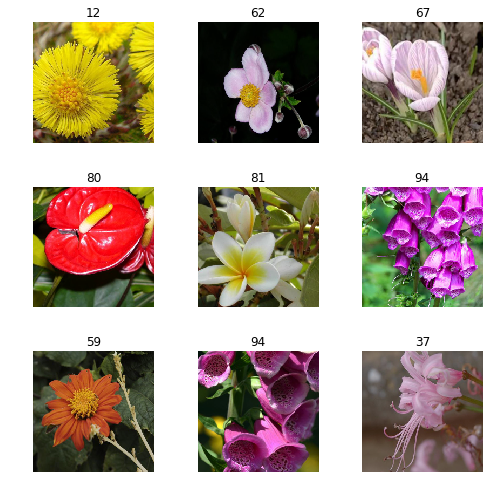

In [76]:
data.show_batch(rows = 3, figsize = (7,7))  # note that it's centre-cropping and resizing

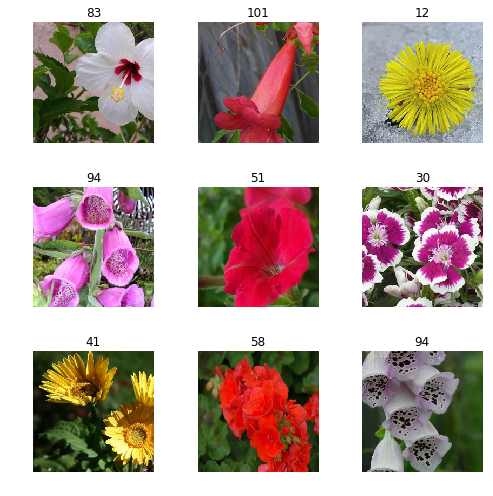

In [77]:
data.show_batch(rows = 3, figsize = (7,7))

In [78]:
print(data.classes)

['99', '44', '31', '93', '58', '97', '90', '102', '28', '56', '5', '88', '46', '78', '15', '17', '50', '1', '74', '71', '80', '69', '3', '32', '86', '22', '8', '79', '91', '37', '57', '25', '2', '42', '81', '47', '62', '87', '66', '83', '39', '7', '94', '73', '101', '92', '45', '26', '96', '84', '23', '53', '6', '29', '11', '89', '55', '52', '19', '14', '21', '61', '65', '34', '49', '98', '38', '64', '85', '41', '60', '43', '12', '59', '4', '27', '54', '40', '48', '35', '18', '77', '100', '51', '63', '76', '75', '82', '30', '67', '20', '10', '16', '70', '13', '9', '33', '36', '72', '95', '68', '24']


In [79]:
len(data.classes), data.c

(102, 102)

In [80]:
learn = create_cnn(data, models.resnet18, metrics = error_rate)

In [82]:
learn.fit_one_cycle(4)

Total time: 18:51
epoch  train_loss  valid_loss  error_rate
1      0.728658    0.339977    0.079462    (04:34)
2      0.478600    0.207414    0.052567    (04:35)
3      0.260838    0.166533    0.039120    (04:42)
4      0.172905    0.158753    0.037897    (04:58)



In [83]:
learn.save("stage-1")

In [84]:
interpret = ClassificationInterpretation.from_learner(learn)

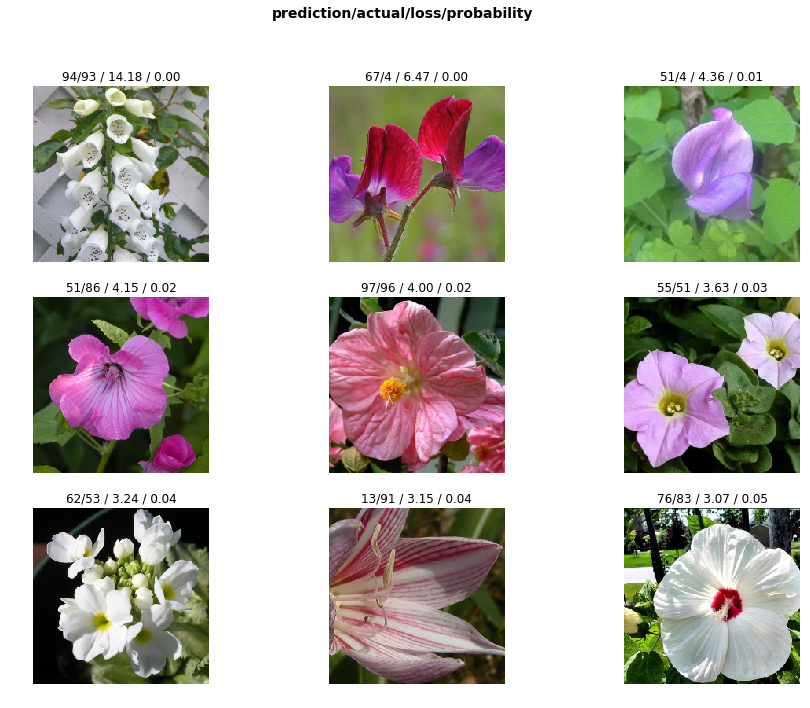

In [85]:
interpret.plot_top_losses(9, figsize=(15,11))

In [87]:
interpret.plot_confusion_matrix(figsize=(120,120), dpi = 60)

In [89]:
interpret.most_confused(min_val=0) # the cnn only got at most one wrong per class, when it predicted wrongly.

[('99', '73', 1),
 ('93', '28', 1),
 ('93', '94', 1),
 ('46', '11', 1),
 ('86', '51', 1),
 ('91', '13', 1),
 ('87', '88', 1),
 ('83', '76', 1),
 ('7', '87', 1),
 ('94', '93', 1),
 ('73', '59', 1),
 ('101', '89', 1),
 ('96', '97', 1),
 ('96', '62', 1),
 ('84', '73', 1),
 ('53', '62', 1),
 ('19', '67', 1),
 ('43', '98', 1),
 ('4', '88', 1),
 ('4', '51', 1),
 ('4', '67', 1),
 ('51', '55', 1),
 ('51', '77', 1),
 ('51', '76', 1),
 ('51', '72', 1),
 ('76', '32', 1),
 ('75', '20', 1),
 ('30', '32', 1),
 ('13', '77', 1),
 ('9', '28', 1),
 ('72', '51', 1)]

In [91]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


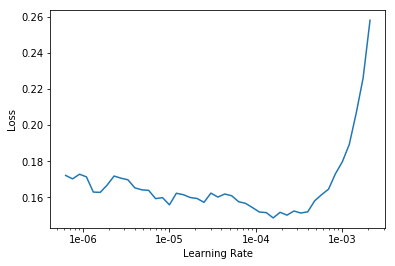

In [92]:
learn.recorder.plot()

In [70]:
learn.unfreeze()

In [93]:
learn.fit_one_cycle(2, max_lr= slice(1e-6,1e-4)) 

Total time: 11:53
epoch  train_loss  valid_loss  error_rate
1      0.148367    0.150981    0.040342    (05:56)
2      0.128113    0.149561    0.039120    (05:56)



In [94]:
learn.save("stage-2")